In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data']
y = mnist['target'].astype(int)

In [3]:
# Normalize pixel values to [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Check shape
print(f"Data shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")


Data shape: (70000, 784)
Target shape: (70000,)


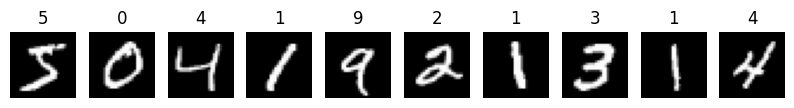

In [5]:
# Plot some sample digits
fig, axes = plt.subplots(1, 10, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_scaled[i].reshape(28, 28), cmap='gray')
    ax.set_title(y[i])
    ax.axis('off')
plt.show()

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
# Elbow method to find optimal k
inertia = []
silhouette = []
ks = range(5, 20, 2)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

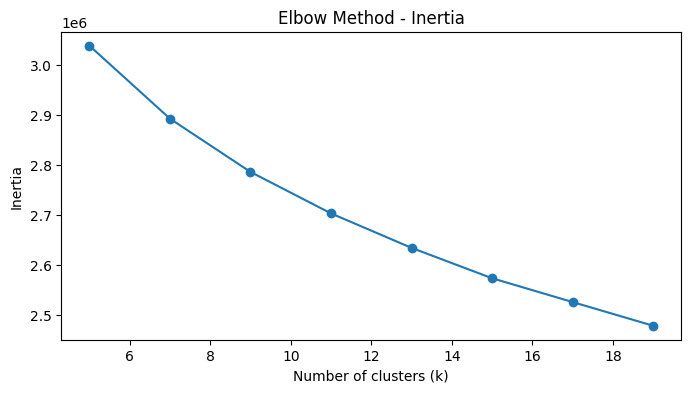

In [8]:
# Plot elbow
plt.figure(figsize=(8, 4))
plt.plot(ks, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method - Inertia')
plt.show()

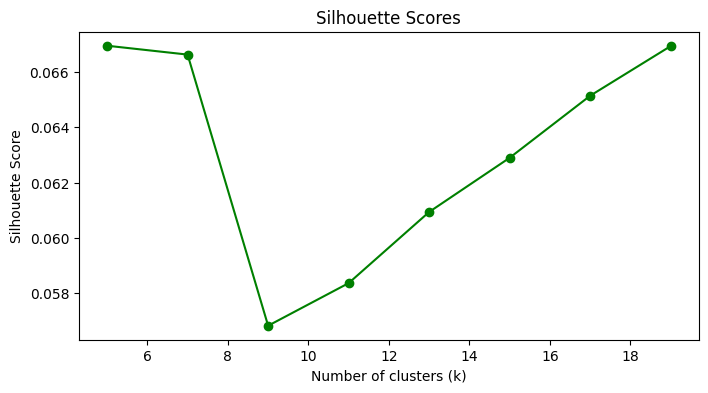

In [9]:
# Plot silhouette
plt.figure(figsize=(8, 4))
plt.plot(ks, silhouette, marker='o', color='green')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.show()

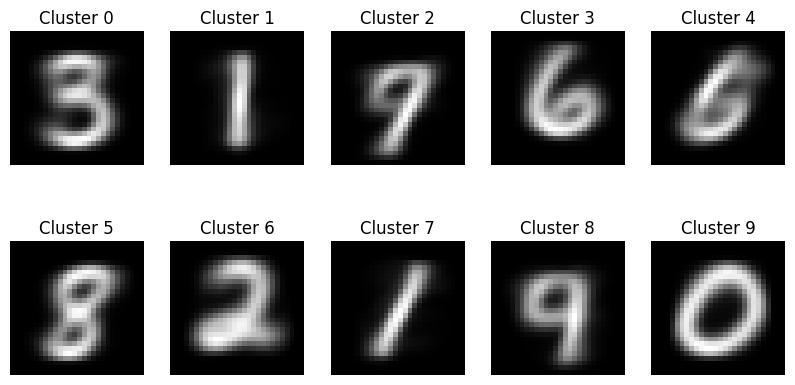

In [10]:
#k=10

# Fit model
kmeans_final = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_final.fit(X_scaled)
clusters = kmeans_final.labels_

# Visualize centroids
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
centroids = kmeans_final.cluster_centers_.reshape(10, 28, 28)
for i, ax in enumerate(axes.flatten()):
    ax.imshow(centroids[i], cmap='gray')
    ax.set_title(f"Cluster {i}")
    ax.axis('off')
plt.show()


In [11]:
# evaluation
new_samples = X_scaled[:5]
predicted_clusters = kmeans_final.predict(new_samples)
print(f"Predicted cluster labels: {predicted_clusters}")

# Compare with original labels
print(f"True labels: {y[:5]}")


Predicted cluster labels: [5 9 8 7 2]
True labels: [5 0 4 1 9]


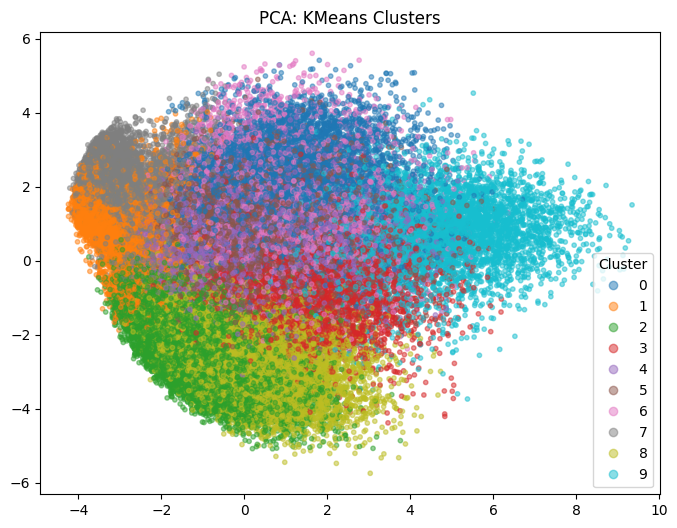

In [12]:
#Dimensionality Reduction + Visualization
#PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', alpha=0.5, s=10)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title('PCA: KMeans Clusters')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


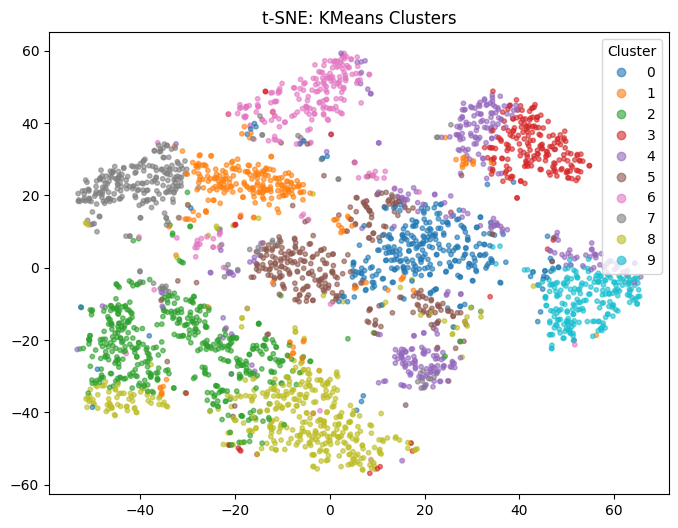

In [13]:
#t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled[:3000])  # t-SNE is slow; subsample for speed
clusters_sub = clusters[:3000]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_sub, cmap='tab10', alpha=0.6, s=10)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.title('t-SNE: KMeans Clusters')
plt.show()


# MNIST Clustering Report

Introduction

I applied K-Means clustering and dimensionality reduction on MNIST. Running the elbow method with silhouette scoring on the full dataset took too long (over an hour). This report summarizes why and how to address it.

Data Preparation

I loaded MNIST (70,000 samples, 784 features) using fetch_openml and scaled pixel values to [0, 1]. Visual checks showed balanced digit distribution.

Clustering

Running K-Means for many k values with silhouette scoring was slow due to high dimensionality and large dataset size. K-Means is costly, and silhouette scoring computes many pairwise distances..

Dimensionality Reduction

PCA and t-SNE on subsets showed better cluster separation for visualization.

Conclusions

Full-data clustering with silhouette scoring is impractical. Subsampling and dimensionality reduction make clustering faster and insights clearer.